In [ ]:
from skimage import io,color
import numpy as np
import matplotlib.pyplot as plt

im = plt.imread('orig.png').astype(float)
im = color.rgb2gray(im) * 255
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')
plt.title('Original image')


In [ ]:
%matplotlib notebook
from scipy import fftpack
im_fft = fftpack.fft2(im)​from scipy import fftpack


def plot_spectrum(im_fft):
    from matplotlib.colors import LogNorm
    # A logarithmic colormap
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure(figsize=(10,10))
plot_spectrum(im_fft)
plt.title('Fourier transform')


In [ ]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.1

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = im_fft.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0


plt.figure()
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

In [ ]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')

In [ ]:

im_fft3 = im_fft.copy()
im_fft3[np.logical_and(im_fft3 > 10**5,im_fft3 < 10**6)] = 0

plt.figure()
plot_spectrum(im_fft3)
plt.title('Filtered Spectrum')

In [ ]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
im_new2 = fftpack.ifft2(im_fft3).real

plt.figure()
plt.imshow(im_new2, plt.cm.gray)
plt.title('Reconstructed Image')

<IPython.core.display.Javascript object>


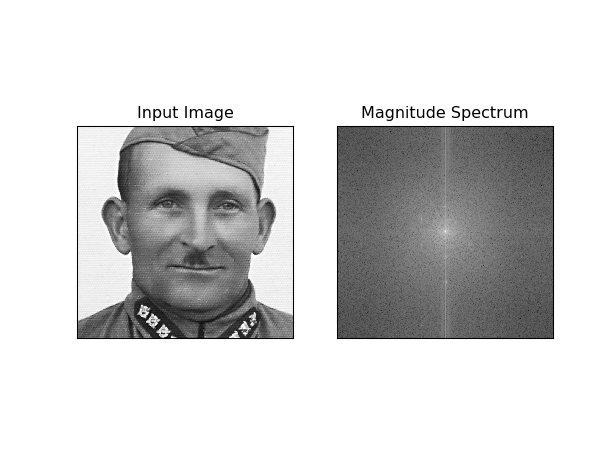

In [5]:
%matplotlib notebook
import cv2
import numpy as np
from matplotlib import pyplot as plt

#img = cv2.imread('orig.png',0)
img = cv2.imread('test2.png',0)
f = np.fft.fft2(img)
#print(f)
fshift = np.fft.fftshift(f)
#print(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))
#print(magnitude_spectrum)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

776 790


<IPython.core.display.Javascript object>


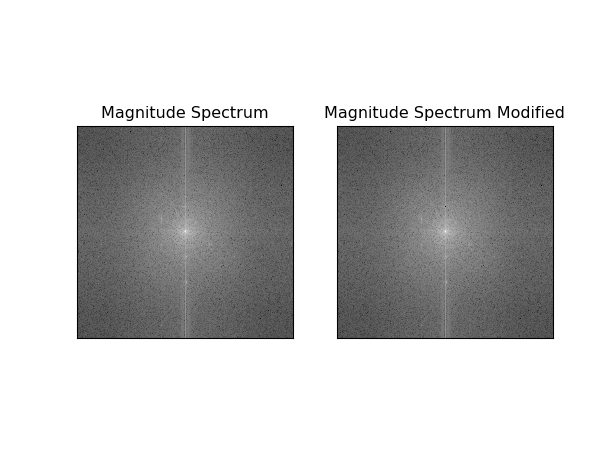

In [7]:
%matplotlib notebook
(x,y) = magnitude_spectrum.shape
magnitude_spectrum_2 = np.copy(magnitude_spectrum)
fshift2 = np.copy(fshift)
print(x,y)
for i in range(x):
    for j in range(y):
        if magnitude_spectrum[i,j] > 240:
            fshift2[i,j] = 0
        
        
magnitude_spectrum_2[magnitude_spectrum_2 > 250] = 0
#magnitude_spectrum[magnitude_spectrum_2 > 250] = 0
magnitude_spectrum_2[x//2-55:x//2+55,y//2-40:y//2+40] = magnitude_spectrum[x//2-55:x//2+55,y//2-40:y//2+40]
fshift2[x//2-55:x//2+55,y//2-40:y//2+40] = fshift[x//2-55:x//2+55,y//2-40:y//2+40]


plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum_2, cmap = 'gray')
plt.title('Magnitude Spectrum Modified'), plt.xticks([]), plt.yticks([])
plt.show()


<IPython.core.display.Javascript object>


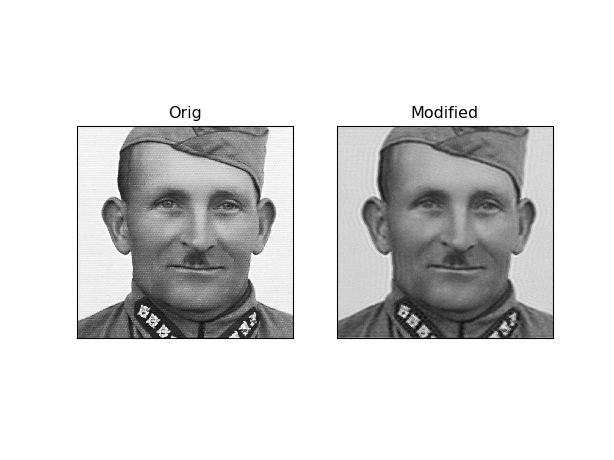

In [8]:
%matplotlib notebook
#print(magnitude_spectrum_2)
f_ishift = np.fft.ifftshift(fshift2)
#print(f_ishift)
img_back = np.fft.ifft2(f_ishift)
#print(img_back)
img_back = np.abs(img_back)
#print(img_back)


plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Orig'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Modified'), plt.xticks([]), plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>


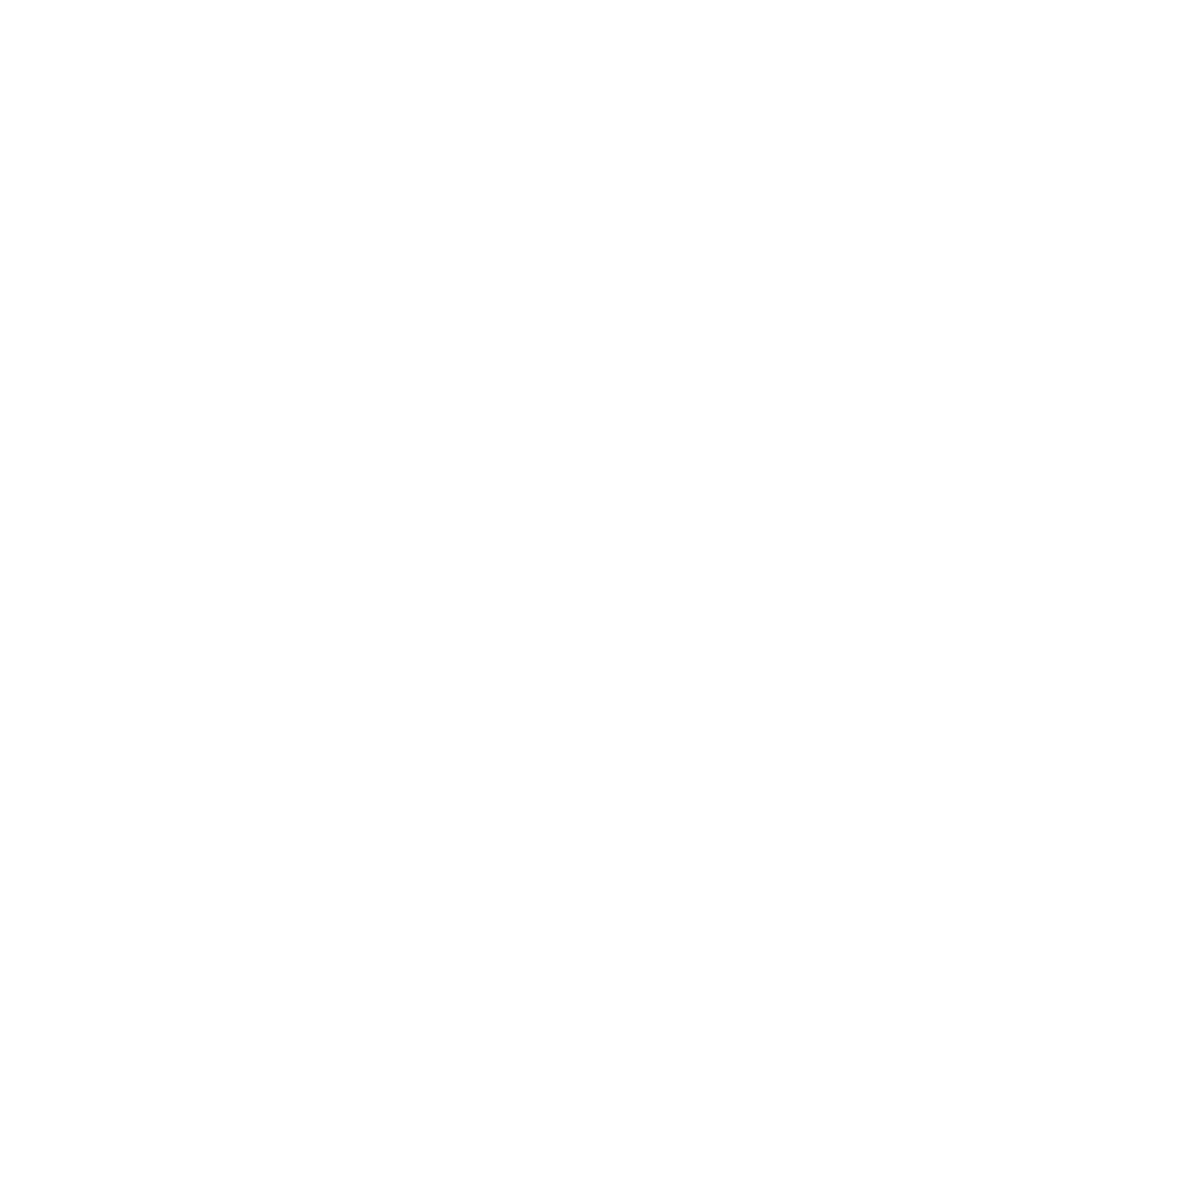

540 404


<IPython.core.display.Javascript object>


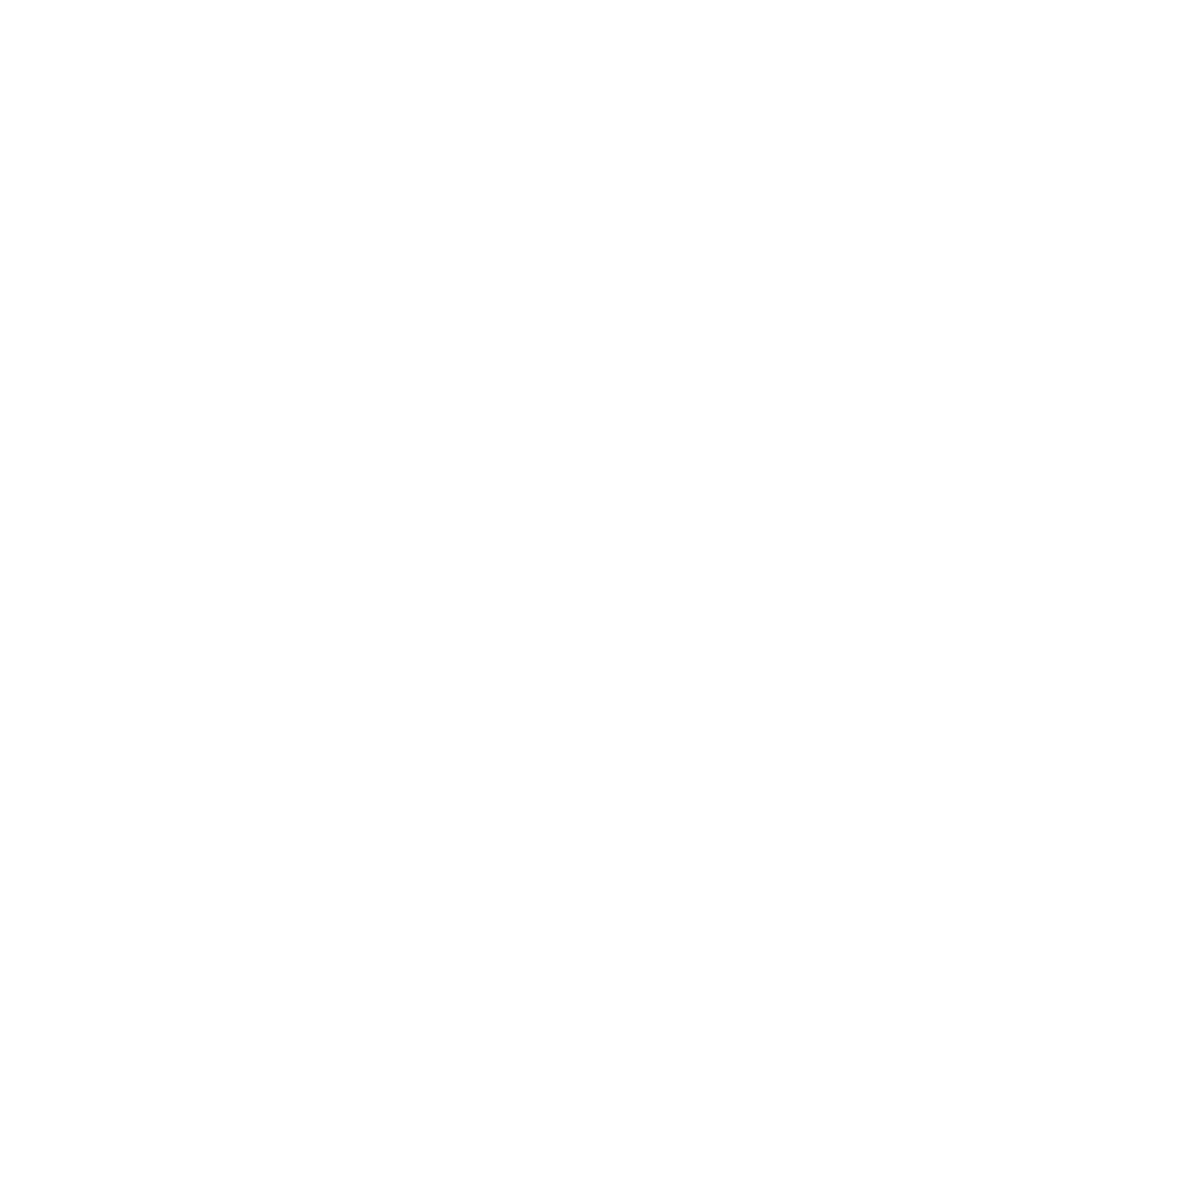

In [27]:
from skimage import io,color
import numpy as np
import matplotlib.pyplot as plt

def crop_center(img,cropx,cropy):
    y,x = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

im = plt.imread('orig.png').astype(float)
im = color.rgb2gray(im) * 255
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')
plt.title('Original image')
(x,y) = im.shape
print(x,y)
#for i in range(1,x):
#    for j in range(1,y):
#        if (j < 160 or j > 240) and (i < 205 or i > 315) :
   #         if(i < 205 or i > 315):
                #if(magnitude_spectrum[i,j] > 200):
                    #print(i,j)
#            im[i,j] = 255

startx = x//2-(20//2)
starty = y//2-(20//2)

im[starty:starty+100,startx:startx+100] = 0

            
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')


In [ ]:
from skimage import io,color
import numpy as np
import matplotlib.pyplot as plt


im = plt.imread('orig.png').astype(float)
im = color.rgb2gray(im) * 255
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')
plt.title('Original image')
(x,y) = im.shape
print(x,y)

im[x//2-50:x//2+50,y//2-50:y//2+50]=0



            
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='gray')
